In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as sio

MDS

In [2]:
class MDS():
    
    def __init__(self, samples, dim=2):
        
        self.samples = samples
        self.dim = dim
        self.N = samples.shape[0]
        
        self.D = self.getD()
        self.B = self.getB()
        self.Z = self.getZ()

        
    def getD(self):
        
        Dij = np.dot(self.samples, self.samples.T)
        diag = Dij.diagonal()
        Dii = np.tile(diag, (self.N, 1))
        Djj = Dii.T
        D = np.sqrt(Dii + Djj - 2 * Dij)
        
        return D
        
    def getB(self):
        
        D = self.D
        Di = np.sum(np.square(D), axis=1, keepdims=1)
        Dj = np.sum(np.square(D), axis=0, keepdims=1)
        Dsum = np.square(D).sum()
        Di = np.tile(Di, self.N)
        Dj = np.tile(Dj, (self.N, 1))
        
        B = (Di + Dj - self.N * np.square(D) - Dsum / self.N) / (2 * self.N)
        
        return B.astype(np.float32)
    
    def getZ(self):
        
        vals, vecs = np.linalg.eig(self.B)
        sort_vals = np.argsort(vals)[::-1]
        
        vals = vals[sort_vals[:self.dim]]
        vecs = vecs[:, sort_vals[:self.dim]]
        
        vals_diag = np.diag(vals)
        
        Z = np.dot(vecs, np.sqrt(vals_diag).T)
        
        return Z
    
    def visualization(self):
        
        points = self.Z
        
        if self.dim == 2:
            plt.plot(points[labels==1, 0],points[labels==1, 1], 'x', label='1')
            plt.plot(points[labels==2, 0],points[labels==2, 1], '.', label='2')
            plt.savefig('dim2.png')
            
        if self.dim == 3:
            fig = plt.figure()
            ax = Axes3D(fig)
            ax.scatter(points[labels==1, 0],points[labels==1, 1], points[labels==1, 2], 'x', label='1')
            ax.scatter(points[labels==2, 0],points[labels==2, 1], points[labels==2, 2], '.', label='2')
            plt.savefig('dim3.png')

Load Dataset MNIST12

In [3]:
dict = sio.loadmat('./datasets/MNIST12.mat')

In [4]:
samples = dict['samples'][:5000]
labels = dict['labels'][:5000]
labels = np.reshape(labels, -1)

二维降维

In [5]:
mds2d = MDS(samples, dim=2)

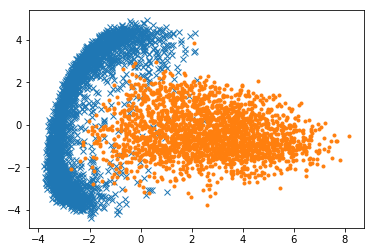

In [6]:
mds2d.visualization()

三维降维

In [7]:
mds3d = MDS(samples, dim=3)

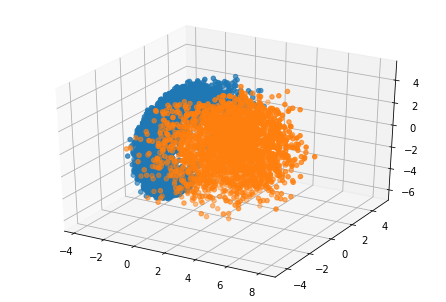

In [8]:
mds3d.visualization()